## **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model for ride durations based on a variety of variables. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi/ride share trip durations. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

[PACE strategy document](https://docs.google.com/document/d/1IejqJvJZQ5SgL6t7VKgvTuIEL9V93w4Wy1HriG8lQ2A/template/preview?resourcekey=0-sMQ1UzEI52Z9ydH1MS3_8Q)

# Build a multiple linear regression model

As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. Please note that this activity is optional, and will not affect your completion of the course.

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

## **PACE stages**


<img src="images/Pace.png" width="100" height="100" align=left>

   *    [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *    [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *    [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *    [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

<img src="images/Plan.png" width="100" height="100" align=left>


# Pace: **Plan Stage**


## Step 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [407]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


Load the NYC TLC dataset provided.

In [408]:
# Data loading

# Read in data from NYC TLC dataset provided and load into dataframe
df0=pd.read_csv("data/2017_Yellow_Taxi_Trip_Data.csv", index_col=0) # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv
# Display "Data loaded" once the data has been loaded
print("Data loaded")

Data loaded


<img src="images/Analyze.png" width="100" height="100" align=left>

# PACE: **Analyze Stage**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?

*1.   Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.*

*2.   EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.*

*3.  Additionally, it can be useful to create variables by multiplying variables together or taking the difference from one variable to another. For example, in this dataset you can create a `trip_duration` variable by subtracting `tpep_dropoff` from `tpep_pickup time`.*


## Step 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [409]:
# Start with `.shape` and `.info()`

# Keep `df0` as the original dataframe and create a copy where changes will go
# Can revert `df` to `df0` if needed down the line
df = df0.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(22699, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null

Use `.head()`.

In [410]:
# Use `.head()`

#  Display first ten rows of the data
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Create `trip_duration`.

In [411]:
# Create `trip_duration` variable

# Display data types of `tpep_dropoff_datetime`, `tpep_pickup_datetime`
print("Data type of tpep_dropoff_datetime:", df["tpep_dropoff_datetime"].dtype)
print("Data type of tpep_pickup_datetime:", df["tpep_pickup_datetime"].dtype)

# Convert `tpep_dropoff_datetime` to datetime format
df["dropoff"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")

# Convert `tpep_pickup_datetime` to datetime format
df["pickup"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

# drop the origianl columns
df= df.drop(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']],axis=1)

# Display data types of `dropoff`, `pickup`
print("Data type of dropoff:", df["dropoff"].dtype)
print("Data type of pickup:", df["pickup"].dtype)

# Compute `trip_duration`
df["trip_duration"] = (df["dropoff"] - df["pickup"])/np.timedelta64(1,"m")

# Display first ten rows of dataframe after adding the new columns
df.head(10)

Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: object
Data type of dropoff: datetime64[ns]
Data type of pickup: datetime64[ns]


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff,pickup,trip_duration
24870114,2,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
35634249,1,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
106203690,1,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
38942136,2,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
30841670,2,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667
23345809,2,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:42:11,2017-03-25 20:34:11,8.000000
37660487,2,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,2017-05-03 20:03:47,2017-05-03 19:04:09,59.633333
69059411,2,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,2017-08-15 18:03:05,2017-08-15 17:41:06,21.983333
8433159,2,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2017-02-04 16:29:14,2017-02-04 16:17:07,12.116667
95294817,1,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,2017-11-10 15:40:55,2017-11-10 15:20:29,20.433333


Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [412]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check for duplicates
print("Shape of dataframe:", df.shape)
print("Shape of dataframe with duplicates dropped:", df.drop_duplicates().shape)

# Check for missing values in dataframe
print("Total count of missing values:", df.isna().sum().sum())

# Display missing values per column in dataframe
print("Missing values per column:")
df.isna().sum()

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dropoff                  0
pickup                   0
trip_duration            0
dtype: int64

Use `.describe()`.

In [413]:
# Display descriptive stats about the data
df.describe(include='all')

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff,pickup,trip_duration
count,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699,22699.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.556236,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,2017-06-29 07:49:49.799726848,2017-06-29 07:32:48.973126656,17.013777
min,1.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,2017-01-01 00:17:20,2017-01-01 00:08:25,-16.983333
25%,1.000000,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,2017-03-30 03:11:20.500000,2017-03-30 03:09:38.500000,6.650000
50%,2.000000,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,2017-06-23 12:55:11,2017-06-23 12:35:57,11.183333
75%,2.000000,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,2017-10-02 10:53:47,2017-10-02 10:34:34,18.383333
max,2.000000,6.000000,33.960000,99.000000,NaN,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,2017-12-31 23:49:24,2017-12-31 23:45:30,1439.550000


Create a scatterplot to visualize the relationship between variables of interest.

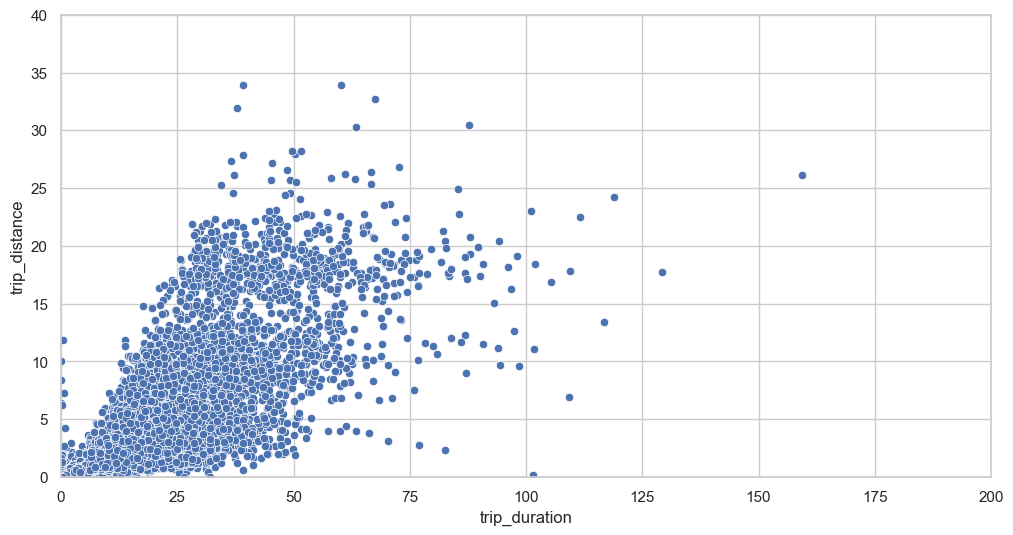

In [414]:
# Create a scatterplot to visualize the relationship between variables of interest
fig = plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df,
    x= 'trip_duration',
    y= 'trip_distance',
)
plt.xlim(0,200)
plt.ylim(0, 40)

plt.show()


Create a pairplot to visualize pairwise relationships between relevant variables.

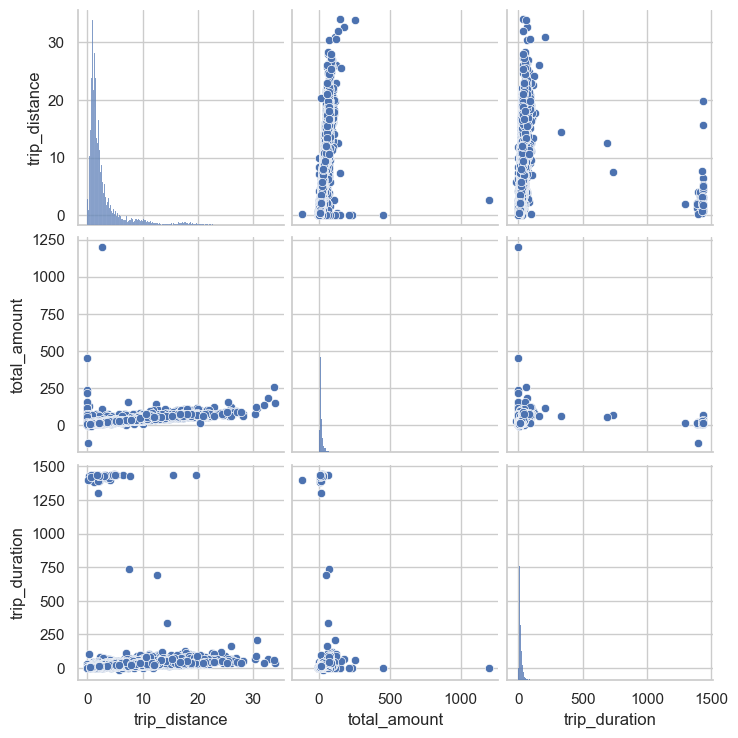

In [415]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df[['trip_distance', 'total_amount', 'trip_duration']]);

## Step 2b. Address any outliers

Use a boxplot to visualize any outliers.

Text(0.5, 1.0, 'Variables with Outliers')

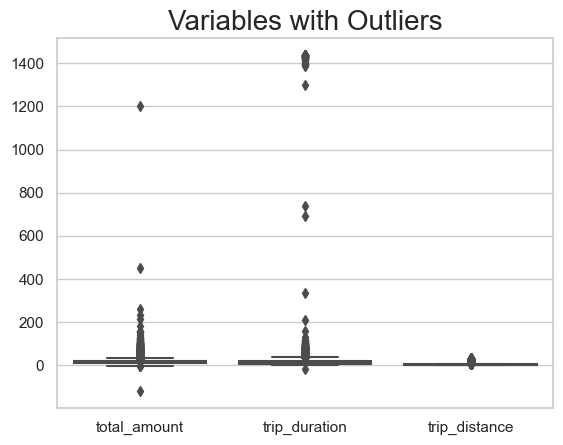

In [416]:
# Create boxplot to visualize the outliers
g = sns.boxplot(data=df[['total_amount', 'trip_duration', 'trip_distance']], showfliers=True);
g.set_title('Variables with Outliers',fontsize=20)

Use a boxplot to visualize the distribution of the data without outliers.

Text(0.5, 1.0, 'Variables without Outliers')

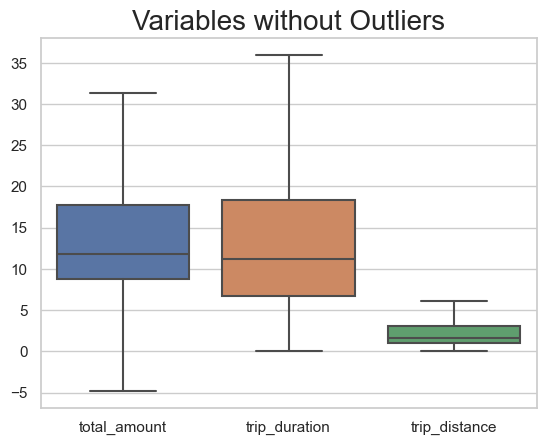

In [417]:
# Create boxplot to visualize distribution of data without outliers
g = sns.boxplot(data=df[['total_amount', 'trip_duration', 'trip_distance']], showfliers=False);
g.set_title('Variables without Outliers',fontsize=20)

##### Remove outliers

Removing outliers in `trip_duration`.

In [418]:
# Compute the 25th and 75th percentile values in `trip_duration`
percentile25 = df['trip_duration'].quantile(0.25)
percentile75 = df['trip_duration'].quantile(0.75)

# Compute the interquartile range for `trip_duration`
iqr = percentile75 - percentile25

# Compute the upper limit for `trip_duration`
upper_limit = percentile75 + 1.5 * iqr
upper_limit

35.983333333333334

In [419]:
# Remove outliers in `trip_duration`:
# Set values greater than the upper limit to the upper limit (approximately 36)
# Set values less than 0 to 0
df[df['trip_duration'] > 36] = 36 # Set val
df[df['trip_duration'] < 0] = 0

# Display descriptive stats after removing outliers in `trip_duration`
df["trip_duration"].describe()

count    22699.000000
mean        13.668828
std          9.245373
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         36.000000
Name: trip_duration, dtype: float64

Then remove outliers in `total_amount`.

In [420]:
# Compute the 25th and 75th percentile values in `total_amount`
percentile25 = df['total_amount'].quantile(0.25)
percentile75 = df['total_amount'].quantile(0.75)

# Compute the interquartile range for `total_amount`
iqr = percentile75 - percentile25

# Compute the upper limit for `total_amount`
upper_limit = percentile75 + 1.5 * iqr
upper_limit

31.375

In [421]:
# Remove outliers in `total_amount`:
# Set values greater than the upper limit to the upper limit (approximately 32)
# Set values less than 0 to 0
df[df['total_amount'] > 32] = 32
df[df['total_amount'] < 0] = 0

# Display descriptive stats after removing outliers in `total_amount`
df['total_amount'].describe()

count    22699.000000
mean        14.481228
std          7.985722
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         32.000000
Name: total_amount, dtype: float64

Then remove outliers in `total_amount`.

In [422]:
# Compute the 25th and 75th percentile values in `total_amount`
percentile25 = df['trip_distance'].quantile(0.25)
percentile75 = df['trip_distance'].quantile(0.75)                                                                                                                  

# Compute the interquartile range for `total_amount`
iqr = percentile75 - percentile25

# Compute the upper limit for `total_amount`
upper_limit = percentile75 + 1.5 * iqr
upper_limit

6.25

In [423]:
# Remove outliers in `total_amount`:
# Set values greater than the upper limit to the upper limit (approximately 32)
# Set values less than 0 to 0
df[df['trip_distance'] > 6] = 6
df[df['trip_distance'] < 0] = 0

# Display descriptive stats after removing outliers in `total_amount`
df['trip_distance'].describe()

count    22699.000000
mean         2.328023
std          1.807688
min          0.000000
25%          1.000000
50%          1.630000
75%          3.100000
max          6.000000
Name: trip_distance, dtype: float64

## Step 2c. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [424]:
# Correlation matrix to help determine most correlated variables

# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df_corr = df.select_dtypes(include='number')
df_corr.corr(method='pearson')

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
VendorID,1.000000,0.788838,0.746382,0.952660,-0.616195,-0.605423,0.913881,-0.267730,0.938702,0.954411,0.745694,0.947804,0.954384,-0.373008,-0.261391
passenger_count,0.788838,1.000000,0.609140,0.771344,-0.497980,-0.485248,0.743916,-0.210259,0.759215,0.773102,0.600401,0.768342,0.773075,-0.298374,-0.204890
trip_distance,0.746382,0.609140,1.000000,0.775735,-0.523897,-0.533557,0.734102,0.316601,0.771087,0.779252,0.757896,0.779892,0.779086,0.196475,0.222935
RatecodeID,0.952660,0.771344,0.775735,1.000000,-0.639380,-0.628358,0.957352,-0.276077,0.980912,0.997283,0.780922,0.991704,0.997627,-0.386427,-0.272081
PULocationID,-0.616195,-0.497980,-0.523897,-0.639380,1.000000,0.466463,-0.615203,0.150013,-0.631894,-0.641042,-0.504377,-0.637648,-0.641221,0.224445,0.153756
DOLocationID,-0.605423,-0.485248,-0.533557,-0.628358,0.466463,1.000000,-0.605475,0.128604,-0.622486,-0.629475,-0.502420,-0.627281,-0.629681,0.201257,0.139237
payment_type,0.913881,0.743916,0.734102,0.957352,-0.615203,-0.605475,1.000000,-0.285568,0.941707,0.958918,0.626925,0.952969,0.958985,-0.435852,-0.275097
fare_amount,-0.267730,-0.210259,0.316601,-0.276077,0.150013,0.128604,-0.285568,1.000000,-0.272402,-0.279167,0.026990,-0.272042,-0.279138,0.963620,0.942508
extra,0.938702,0.759215,0.771087,0.980912,-0.631894,-0.622486,0.941707,-0.272402,1.000000,0.983552,0.775829,0.977190,0.983555,-0.366856,-0.265578
mta_tax,0.954411,0.773102,0.779252,0.997283,-0.641042,-0.629475,0.958918,-0.279167,0.983552,1.000000,0.783069,0.993438,0.999967,-0.389207,-0.270025


Visualize a correlation heatmap of the data.

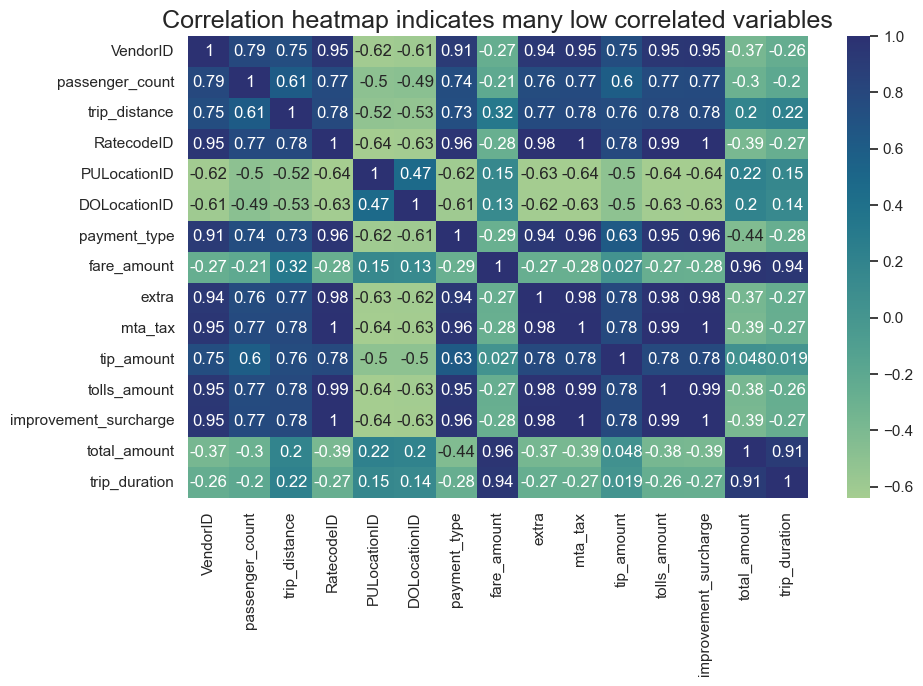

In [425]:
# Create correlation heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(method='pearson'), annot=True, cmap="crest")  
plt.title("Correlation heatmap indicates many low correlated variables",
          fontsize=18)
plt.show()

<img src="images/Construct.png" width="100" height="100" align=left>

# PACE: **Construct Stage**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in the [PACE Strategy Doc](https://docs.google.com/document/d/1HzWWcQzBqsySFdpftbXjHDDkEUxa8Q9Rh7goVnSrAfc/edit?usp=sharing) to reflect on the Constructing stage of this task.
* Why did you select the X variables you did?

Dropped columns based on correlations between variables and multicollinearity, and fine-tuned by running and rerunning models to examine change in R^2, MAE, and RMSE.

## Step 3a. Select outcome variable and features

Set your Y and X variables. Y represents the outcome variable, and X represents the features.

In [426]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff,pickup,trip_duration
24870114,2,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
35634249,1,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
106203690,1,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
38942136,2,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
30841670,2,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667


#### Set Variables

In [427]:
# Set  Y and X variables

# Set Y variable
Y = df[["trip_duration"]]

# Remove the target column from the features
X = df.drop(columns="trip_duration")

# Display first few rows
X.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff,pickup
24870114,2,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43
35634249,1,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28
106203690,1,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56
38942136,2,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59
30841670,2,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20


## Step 3b. Pre-process data

The pickup and dropoff location ID variables are going to be dropped in this exemplar. Including them as categorical features would involve one-hot encoding, which would add a bunch of columns to the dataset, adding model complexity and leading to overfitting.

To help with processing time, consider dropping irrelevant and redundant columns.

In [428]:
# Pre-process data
columns_to_drop1 = ['store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 'total_amount',
                   'dropoff', 'pickup']

columns_to_drop2 = ['improvement_surcharge','fare_amount','extra',
                    'mta_tax','tip_amount','tolls_amount',
                    'store_and_fwd_flag','PULocationID','DOLocationID',
                    'payment_type', 'dropoff', 'pickup']

columns_to_drop3 = ['improvement_surcharge','fare_amount','extra',
                    'mta_tax','tip_amount','tolls_amount',
                    'store_and_fwd_flag','PULocationID','DOLocationID',
                    'payment_type', 'dropoff', 'pickup', 'trip_distance'] # dropped trip distance due to linear correlation of total_amount to trip_distance

X = X.drop(columns_to_drop3, axis=1)
X.head()

,VendorID,passenger_count,RatecodeID,total_amount
24870114,2,6,1,16.56
35634249,1,1,1,20.80
106203690,1,1,1,8.75
38942136,2,1,1,27.69
30841670,2,1,1,17.80


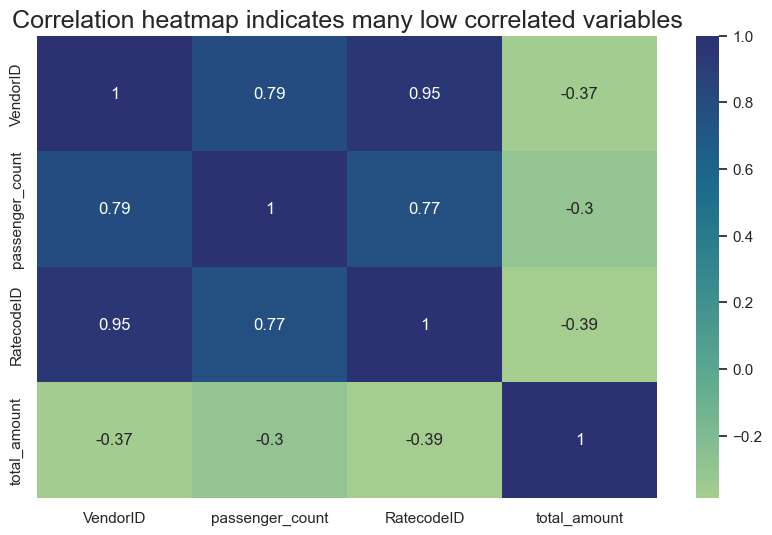

In [429]:
# Create correlation heatmap

plt.figure(figsize=(10,6))
sns.heatmap(X.corr(method='pearson'), annot=True, cmap="crest")  
plt.title("Correlation heatmap indicates many low correlated variables",
          fontsize=18)
plt.show()

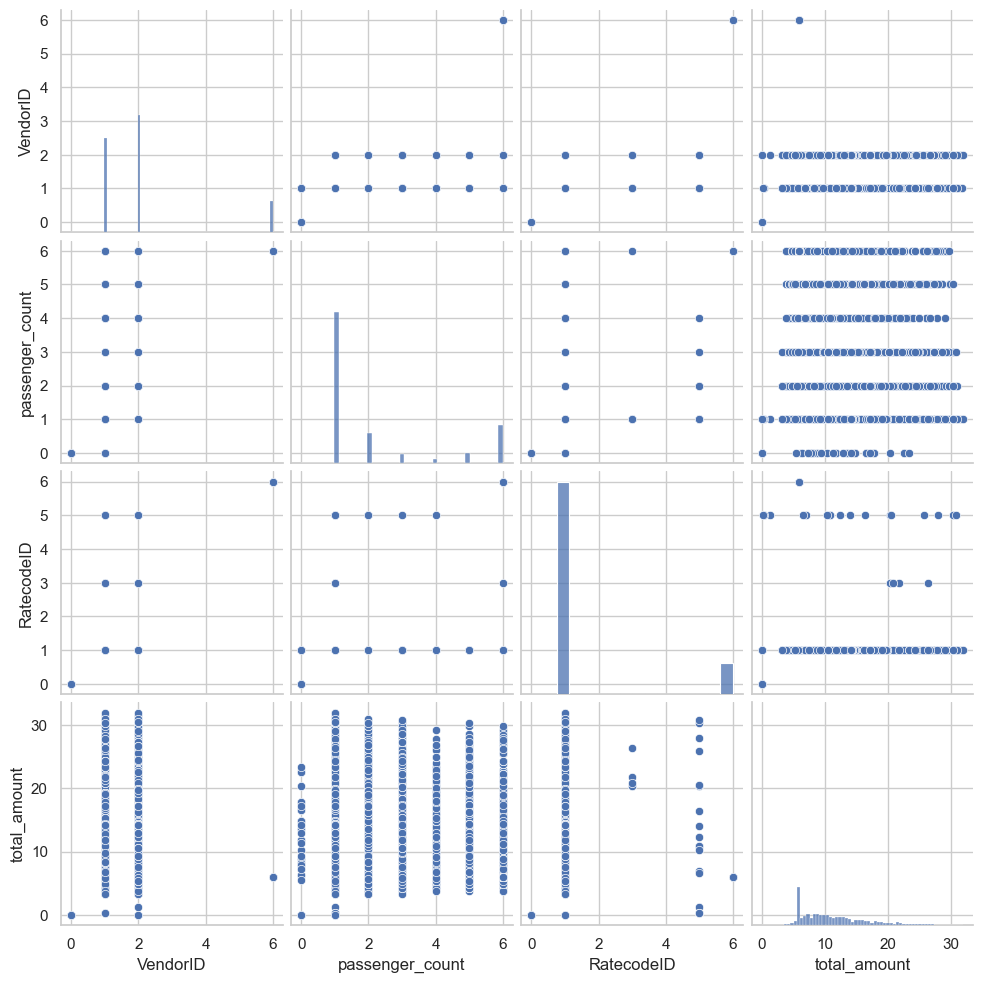

In [430]:
sns.pairplot(X)

Use `StandardScaler()` and `fit_transform()` to standardize the X variables.

In [431]:
# Standardize the X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("X scaled:", X_scaled)

X scaled: [[-0.07933171  2.01575963 -0.38448189  1.01714788]
 [-0.72131051 -0.63287702 -0.38448189  1.83342218]
 [-0.72131051 -0.63287702 -0.38448189 -0.48641398]
 ...
 [-0.07933171 -0.63287702 -0.38448189 -1.15059944]
 [-0.07933171 -0.63287702 -0.38448189  0.33178549]
 [-0.72131051 -0.63287702 -0.38448189  0.55318065]]


## Step 3c. Build model

Create training and testing sets.

In [432]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,  test_size=0.2, random_state=0)

Build and fit your model to the training data.

In [433]:
# Build and fit your model to the training data
lr=LinearRegression()
model = lr.fit(X_train,Y_train)

## Step 3d. Evaluate model

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [437]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train, Y_train)
print("Coefficient of determination:", r_sq)
Y_pred = lr.predict(X_train)
print("R^2:", r2_score(Y_train, Y_pred))
print("MAE:", mean_absolute_error(Y_train,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_train, Y_pred)))

Coefficient of determination: 0.8317257920164723
R^2: 0.8317257920164723
MAE: 1.785093603884837
RMSE: 2.7014439081078048


In [438]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test, Y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(Y_test, Y_pred_test))
print("MAE:", mean_absolute_error(Y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

Coefficient of determination: 0.8330173855879532
R^2: 0.8330173855879532
MAE: 1.8105538644016392
RMSE: 2.729243255703734


The model performance is similar across both training and test sets, suggesting that there is no bias in the model and that the model is not overfit.

<img src="images/Execute.png" width="100" height="100" align=left>

# PACE: **Execute Stage**

Consider these questions [PACE Strategy Doc](https://docs.google.com/document/d/1HzWWcQzBqsySFdpftbXjHDDkEUxa8Q9Rh7goVnSrAfc/edit?usp=sharing) to reflect on the Execute stage of this task.

## Step 4a. Results

If the linear regression assumptions are met, the model results can be appropriately interpreted.

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [439]:
# Create a `results` dataframe
results = pd.DataFrame(data={"actual": Y_test["trip_duration"],
                             "predicted": Y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]
results.head()

,actual,predicted,residual
102188254,18.016667,18.269183,-0.252516
50574134,6.000000,5.918659,0.081341
14767643,5.883333,6.014665,-0.131331
16019414,15.950000,17.069665,-1.119665
1352127,11.900000,9.217070,2.682930


## Step 4b. Visualize model results

Create a scatterplot to visualize `predicted` over `actual`.

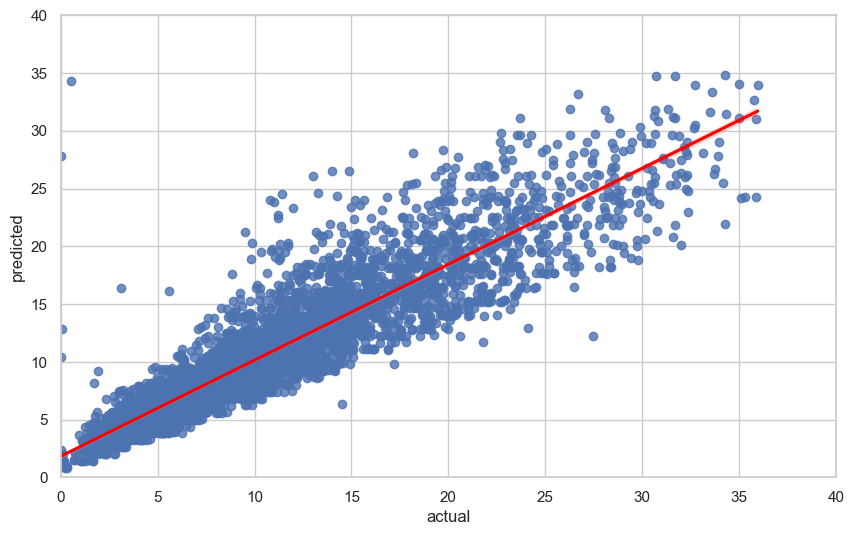

In [440]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
sns.regplot(x="actual",
           y="predicted",
           data=results, line_kws={"color": "red"})
plt.ylim(0, 40)
plt.xlim(0,40)
plt.show()

Visualize the distribution of the `residuals`.

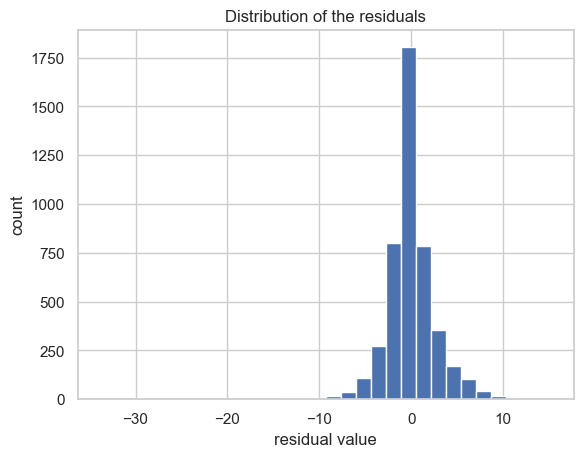

In [441]:
# Visualize the distribution of the `residuals`
plt.hist(results["residual"], bins=30)
plt.title("Distribution of the residuals")
plt.xlabel("residual value")
plt.ylabel("count")
plt.show()

Create a scatterplot of `residuals` over `predicted`.

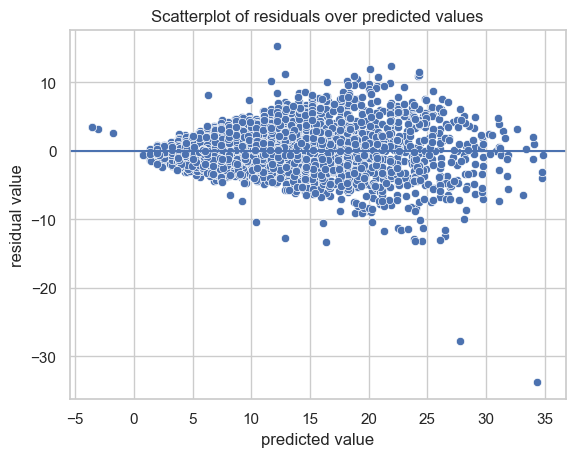

In [442]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x="predicted", y="residual", data=results)
plt.axhline(0)
plt.title("Scatterplot of residuals over predicted values")
plt.xlabel("predicted value")
plt.ylabel("residual value")
plt.show()

## Step 4c. Conclusion

**What are the key takeaways from this notebook?**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.

**What results can be presented from this notebook?**

*  You can discuss meeting linear regression assumptions, and you can present the MAE and RMSE scores obtained from the model.